In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Загружаем результаты тестирования алгоритмов Sipp и Anytime Sipp из файлов "results.csv" и "anytime_results.csv" в таблицы. Выбрасываем тесты, в которых путь не был найден. Для наглядности, выведем 5 случайных строк этой таблицы c Sipp:

In [35]:
sipp_df = pd.read_csv("results.csv")
sipp_df.taskfile = sipp_df.taskfile.transform(lambda file: file[file.rfind('/') + 1:])
sipp_df = sipp_df[sipp_df.found == 1]

anytime_df = pd.read_csv("anytime_results.csv")
anytime_df.taskfile = anytime_df.taskfile.transform(lambda file: file[file.rfind('/') + 1:])
anytime_df = anytime_df[anytime_df.found == 1]

sipp_df.sample(5).sort_index()
anytime_df[anytime_df.obstaclesN == 50][anytime_df.width == 1024][anytime_df.nodescreated < 4000]

,taskfile,width,height,obstaclesN,hweight,lastSuboptimalityBound,found,length,nodescreated,numberofsteps,...,notused.1,notused.2,notused.3,notused.4,notused.5,notused.6,notused.7,notused.8,notused.9,notused.10
6665,Berlin_0_1024_50_1.xml,1024,1024,50,2,1,1,1057,3583,2717,...,0.041178,0.041178,0.041178,0.041178,0.041178,0.041178,0.041178,0.041178,0.041178,0.085937
6690,London_1_1024_50_2.xml,1024,1024,50,2,1,1,1169,3687,2976,...,0.062910,0.062910,0.062910,0.062910,0.062910,0.062910,0.062910,0.062910,0.062910,0.109679
6997,NewYork_1_1024_50_4.xml,1024,1024,50,2,1,1,1113,3651,2024,...,0.047614,0.047614,0.047614,0.047614,0.047614,0.047614,0.047614,0.047614,0.047614,0.100456
7020,Boston_1_1024_50_3.xml,1024,1024,50,2,1,1,1061,3281,1061,...,0.038823,0.038823,0.038823,0.038823,0.038823,0.038823,0.038823,0.038823,0.038823,0.038823
7415,Berlin_0_1024_50_1.xml,1024,1024,50,5,1,1,1057,3588,2624,...,0.035970,0.035970,0.035970,0.035970,0.035970,0.035970,0.035970,0.035970,0.035970,0.123429
7440,London_1_1024_50_2.xml,1024,1024,50,5,1,1,1169,3652,2751,...,0.065373,0.065373,0.065373,0.065373,0.065373,0.065373,0.065373,0.065373,0.065373,0.132907
7549,Berlin_2_1024_50_0.xml,1024,1024,50,5,1,1,1244,3971,2591,...,0.045542,0.045542,0.045542,0.045542,0.045542,0.045542,0.045542,0.045542,0.045542,0.131126
7693,Milan_0_1024_50_3.xml,1024,1024,50,5,1,1,1056,3325,1056,...,0.036698,0.036698,0.036698,0.036698,0.036698,0.036698,0.036698,0.036698,0.036698,0.036698
7747,NewYork_1_1024_50_4.xml,1024,1024,50,5,1,1,1113,3733,2102,...,0.050019,0.050019,0.050019,0.050019,0.050019,0.050019,0.050019,0.050019,0.050019,0.128079
7770,Boston_1_1024_50_3.xml,1024,1024,50,5,1,1,1061,3281,1061,...,0.036143,0.036143,0.036143,0.036143,0.036143,0.036143,0.036143,0.036143,0.036143,0.036143


В следующей таблице представлены данные, сгруппированные по размеру карты и количеству динамических препятствий и далее усредненные по каждому из параметров (nodescreated - количество созданных состояний, numberofsteps - количество итераций алгоритма, searchtime - время работы алгоритма).

In [12]:
sipp_df.groupby(['width', 'obstaclesN']).mean()[['found', 'length', 'nodescreated', 'numberofsteps', 'searchtime']]

found       length   nodescreated  numberofsteps  searchtime
width obstaclesN                                                              
256   10            1.0   309.924658    5041.191781    4172.493151    0.029319
      20            1.0   320.979730    5763.925676    4559.763514    0.041429
      50            1.0   321.653061    7780.156463    5491.659864    0.089862
      100           1.0   313.527027    8751.777027    5020.682432    0.142150
      200           1.0   314.539568   10277.539568    4902.877698    0.255010
      500           1.0   313.360544   16076.802721    7201.047619    0.837235
      1000          1.0   315.751773   17234.936170    7438.815603    1.813978
512   10            1.0   636.791667   16598.701389   14896.201389    0.107289
      20            1.0   621.184932   18056.958904   15825.623288    0.143465
      50            1.0   626.699301   18814.153846   14792.741259    0.227395
      100           1.0   629.551020   23431.755102   16452.727891    0.440166
      200           1.0   621.554795   24928.356164   14751.465753    0.705970
      500           1.0   625.678082   39054.356164   18599.034247    2.046293
      1000          1.0   638.027211   48585.319728   20922.272109    4.681575
1024  10            1.0  1263.287671   55955.917808   52841.013699    0.413633
      20            1.0  1235.306122   61244.884354   54993.360544    0.551332
      50            1.0  1270.109589   66732.082192   57155.801370    0.867240
      100           1.0  1256.061224   79222.265306   65103.034014    1.623834
      200           1.0  1256.172414   93757.689655   67844.703448    3.075061
      500           1.0  1270.500000  124018.694444   71743.159722    7.794057
      1000          1.0  1260.601351  164900.702703   80169.858108   16.785277

Таким образом, путь в заданиях с любой конфигурацией ищется в среднем менее, чем за 17 секунд. А для карт 256x256 алгоритм работает в среднем менее 2 секунд для любого количества препятствий до 1000.

Чтобы проанализировать как зависит количество создающихся состояний (nodescreated) и время работы алгоритма от количества динамических препятствий, построим графики. Здесь на первом графике каждая кривая показывает зависимость усредненного числа созданных при работе алгоритма состояний среди тестов с картами одного размера от числа динамических препятствий на них. На втором - зависимость усредненного времени работы алгоритма среди тестов с картами одного размера от числа динамических препятствий.

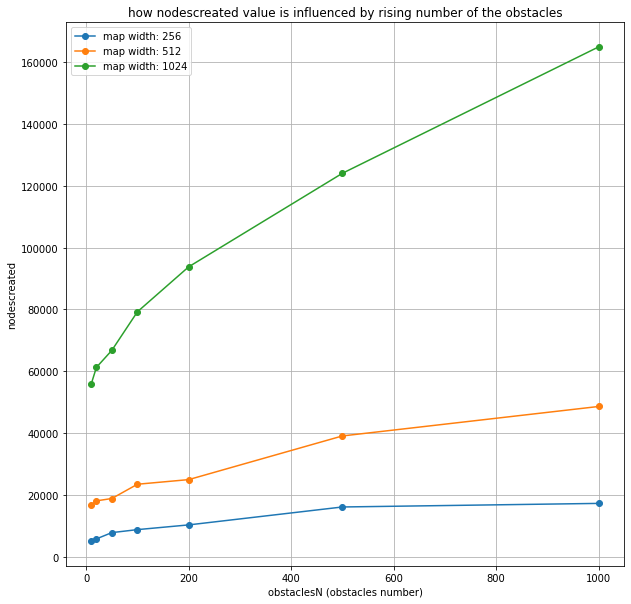

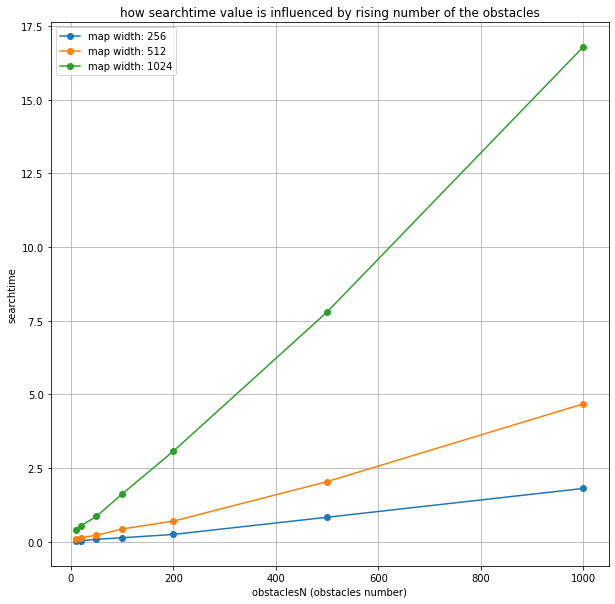

In [27]:
for trait in ['nodescreated', 'searchtime']:
    plt.figure(figsize=(10,10))
    for width in [256, 512, 1024]:
        df = sipp_df[sipp_df.width == width].groupby(['obstaclesN']).mean()[trait]
        plt.plot(df.index, df.values, marker='o', label="map width: " + str(width))
    plt.xlabel("obstaclesN (obstacles number)")
    plt.ylabel(trait)
    plt.title("how {} value is influenced by rising number of the obstacles".format(trait))
    plt.legend()
    plt.grid()
    plt.show()


Из этих графиков видно, что с ростом количества динамических препятствий, время работы алгоритма и количество создающихся состояний растет линейно.

Далее посмотрим, как зависит количество создающихся состояний (nodescreated) и время работы алгоритма от размера стороны карты. Здесь на левом графике каждая кривая показывает зависимость усредненного числа созданных при работе алгоритма состояний среди тестов с одним количеством динамических препятствий от размера стороны карты. На правом - зависимость усредненного времени работы алгоритма среди тестов с одним количеством динамических препятствий от размера стороны карты.

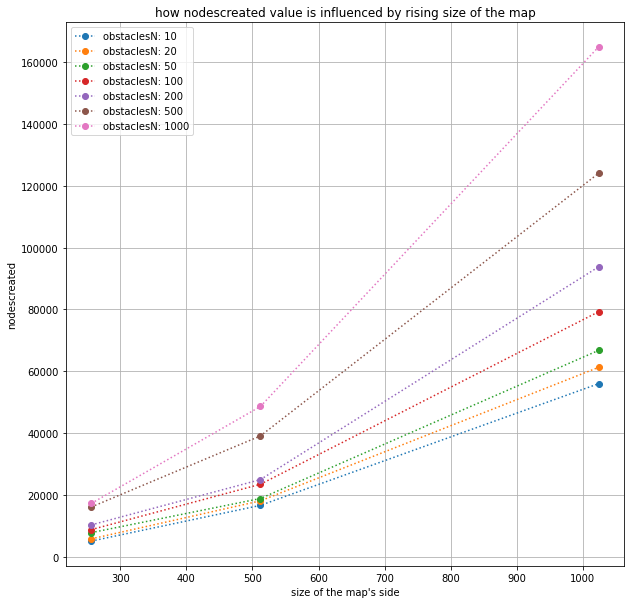

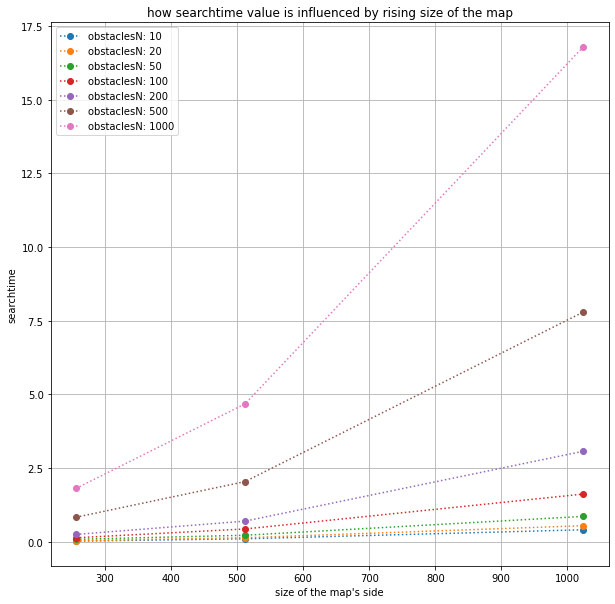

In [8]:
for trait in ['nodescreated', 'searchtime']:
    plt.figure(figsize=(10, 10))
    for obstaclesN in [10, 20, 50, 100, 200, 500, 1000]:
        df = sipp_df[sipp_df.obstaclesN == obstaclesN].groupby(['width']).mean()[trait]
        plt.plot(df.index, df.values, marker='o', ls=':', label="obstaclesN: " + str(obstaclesN))
    plt.xlabel("size of the map\'s side")
    plt.ylabel(trait)
    plt.title("how {} value is influenced by rising size of the map".format(trait))
    plt.legend()
    plt.grid()
    plt.show()

Конечно, по трем точкам мы не можем делать явные выводы о зависимости, но по этим графикам, можно предположить, что при больших числах динамических препятствий, эти зависимости всё более похожи на экспоненциальные. К сожалению, в этом датасете городских карт нет других размеров – ни размеров более 1024x1024, ни промежуточных размеров карт, ни карт меньше 256x256, поэтому проверить эту гипотезу не удалось.

# Anytime Sipp


Посмотрим ту же самую таблицу с усредненными величинами для Anytime Sipp:

In [36]:
anytime_df.groupby(['width', 'obstaclesN']).mean()[['found', 'length', 'nodescreated', 'numberofsteps', 'searchtime', 'firstSearchtime']]

found       length   nodescreated  numberofsteps  \
width obstaclesN                                                     
256   10            1.0   309.924658    7922.753425    8938.589041   
      20            1.0   320.979730    8918.335586   10407.837838   
      50            1.0   321.653061   12645.807256   13229.741497   
      100           1.0   313.527027   14035.297297   10870.153153   
      200           1.0   314.539568   16224.314149   10157.541966   
      500           1.0   312.131944   23583.787037   13295.761574   
      1000          1.0   315.751773   27887.321513   15240.763593   
512   10            1.0   636.791667   25707.238426   31456.435185   
      20            1.0   621.184932   28655.121005   37115.493151   
      50            1.0   626.699301   29717.223776   30528.139860   
      100           1.0   629.551020   37313.292517   38066.727891   
      200           1.0   621.554795   40002.518265   30978.317352   
      500           1.0   625.678082   61434.536530   37876.924658   
      1000          1.0   638.027211   76121.176871   41781.895692   
1024  10            1.0  1263.287671  103530.109589  149259.041096   
      20            1.0  1235.306122  114494.959184  149624.712018   
      50            1.0  1270.109589  127033.678082  130796.205479   
      100           1.0  1256.061224  140654.519274  161674.786848   
      200           1.0  1256.172414  153935.133333  165024.105747   
      500           1.0  1270.500000  204245.481481  171083.708333   
      1000          1.0  1260.601351  258925.504505  168536.632883   

                  searchtime  firstSearchtime  
width obstaclesN                               
256   10            0.078624         0.008304  
      20            0.101844         0.012746  
      50            0.177772         0.024667  
      100           0.232068         0.035828  
      200           0.361057         0.063534  
      500           0.966718         0.163624  
      1000          2.106191         0.365626  
512   10            0.294194         0.024357  
      20            0.372154         0.032240  
      50            0.442043         0.049478  
      100           0.750016         0.094731  
      200           1.025645         0.143562  
      500           2.589699         0.387165  
      1000          5.485540         0.776011  
1024  10            1.617259         0.105296  
      20            1.745716         0.113211  
      50            1.897069         0.196562  
      100           3.265553         0.343568  
      200           4.971380         0.657914  
      500          10.954093         1.443444  
      1000         21.091985         2.439664

Таким образом, путь в заданиях с любой конфигурацией ищется в среднем менее, чем за 22 секунды. А для карт 256x256 алгоритм работает в среднем менее 2.5 секунд для любого количества препятствий до 1000.

В целом, время работы Anytime Sipp, хоть и незначительно, но всё-таки больше, чем время работы Sipp. Но, это компенсируется тем, что первый путь, полученный Anytime Sipp, находится в разы быстрее работы Sipp. А следовательно, видно большое преимущество Anytime версии алгоритма: агент может сразу начать двигаться, а не ждать на месте, пока закончится поиск оптимального пути. Особенно, это важно на больших тестах, например, на картах 1024x1024 c 1000 препятствиями, где оптимальный путь ищется в среднем более 20 секунд.

Рассмотрим подробнее зависимость searchtime и firstSearchtime от длины итогового пути для разных начальных весов эвристики. Для этого был проведен дополнительный эксперимент на картах 512x512 с 500 динамическими препятствиями. По 50 тестов на каждой из 30 карт. Итого 1500 тестов. Каждый тест был запущен с разными весами эвристики (2, 5, 10).

In [16]:
any500_df = pd.read_csv("anytime_500_results.csv")
any500_df.taskfile = any500_df.taskfile.transform(lambda file: file[file.rfind('/') + 1:])
any500_df = any500_df[any500_df.found == 1]

In [17]:
def smooth_lengths(results_df, hweight):
    lengths = []
    chunk_size = 125
    mydf = results_df[results_df.hweight == hweight].sort_values(['length'])
    for i in range(0, mydf.shape[0], chunk_size):
        chunk = mydf.iloc[i : min(i + chunk_size, mydf.size)]
        lengths.extend([chunk.mean().length] * (min(i + chunk_size, mydf.shape[0]) - i))

    mydf.length = lengths
    return mydf

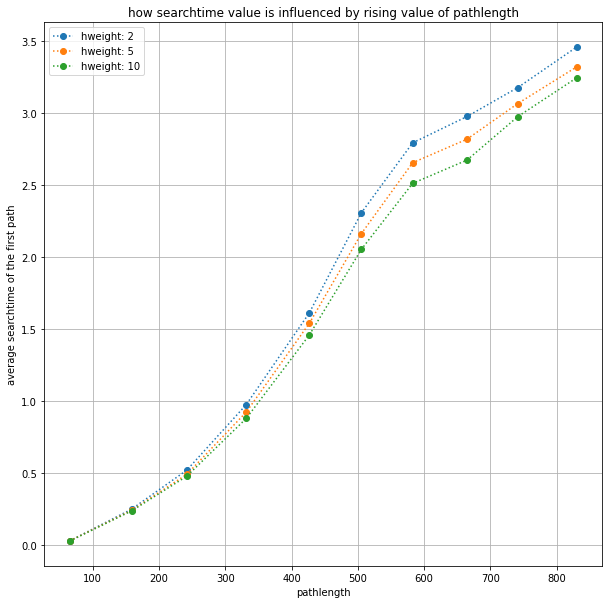

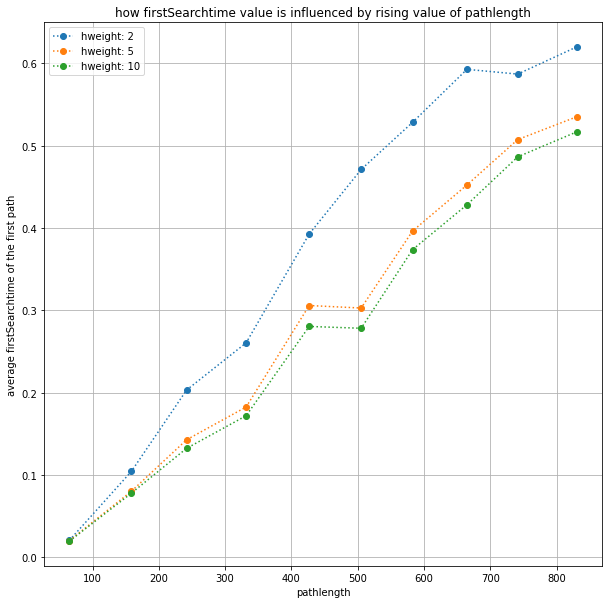

In [19]:
for trait in ['searchtime', 'firstSearchtime']:
    plt.figure(figsize=(10, 10))
    for hweight in [2, 5, 10]:
        df = smooth_lengths(any500_df, hweight)[:-200].groupby(['length']).mean()[[trait]]
        plt.plot(df.index, df.values, marker='o', ls=':', label="hweight: " + str(hweight))
    plt.xlabel("pathlength")
    plt.ylabel("average {} of the first path".format(trait))
    plt.title("how {} value is influenced by rising value of pathlength".format(trait))
    plt.legend()
    plt.grid()
    plt.show()

Из графиков видно, что чем больше начальный вес эвристики, тем быстрее ищатся пути. Время поиска первого пути, как и пути в целом растет линейно. А также, время поиска первого пути сильно меньше поиска пути алгоритмом Sipp.